In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

pd.set_option('max_r', None)
pd.set_option('max_columns', None)

In [4]:
%pwd

'/Users/nicholasreardon/Documents/School/Applied Data Science'

In [5]:
df = pd.read_excel('Coronavirus trends.xlsx')

In [6]:
df.shape

(97576, 6)

In [7]:
df.sample(10)

,date,county,state,fips,cases,deaths
60298,2022-02-14,Perkins,Nebraska,31135.0,518,12.0
38808,2022-02-07,Page,Virginia,51139.0,5368,103.0
56448,2022-02-13,East Feliciana,Louisiana,22037.0,7213,159.0
33746,2022-02-06,Charles,Maryland,24017.0,26537,326.0
36981,2022-02-07,Lincoln,Maine,23015.0,3815,21.0
19453,2022-02-01,Iowa,Wisconsin,55049.0,4882,24.0
9998,2022-01-30,Solano,California,6095.0,74199,407.0
8989,2022-01-29,Codington,South Dakota,46029.0,7865,94.0
19858,2022-02-02,Collier,Florida,12021.0,78527,926.0
81593,2022-02-21,Kiowa,Colorado,8061.0,326,6.0


In [8]:
df.fillna(0, inplace=True)

In [9]:
df.sample(10)

,date,county,state,fips,cases,deaths
34184,2022-02-06,Phillips,Montana,30071.0,1003,28.0
1185,2022-01-27,West Feliciana,Louisiana,22125.0,2655,41.0
41108,2022-02-08,Ashland,Ohio,39005.0,11728,202.0
17160,2022-02-01,Warren,Iowa,19181.0,11464,121.0
56440,2022-02-13,Caldwell,Louisiana,22021.0,2991,46.0
41449,2022-02-08,Vega Alta,Puerto Rico,72143.0,5942,0.0
41666,2022-02-08,White,Tennessee,47185.0,7521,120.0
84923,2022-02-22,Lafayette,Florida,12067.0,2746,52.0
27372,2022-02-04,Cook,Minnesota,27031.0,513,2.0
59598,2022-02-14,Franklin,Kentucky,21073.0,12681,127.0


In [10]:
mi = df[df['state']=='Michigan']

In [11]:
mi.shape

(2520, 6)

In [12]:
len(mi['county'].unique())

84

In [13]:
# Days of data

2520/84

30.0

In [14]:
mi.head()

,date,county,state,fips,cases,deaths
1244,2022-01-27,Alcona,Michigan,26001.0,1588,63.0
1245,2022-01-27,Alger,Michigan,26003.0,1731,12.0
1246,2022-01-27,Allegan,Michigan,26005.0,24955,304.0
1247,2022-01-27,Alpena,Michigan,26007.0,5068,123.0
1248,2022-01-27,Antrim,Michigan,26009.0,3939,53.0


In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='date', ylabel='deaths'>

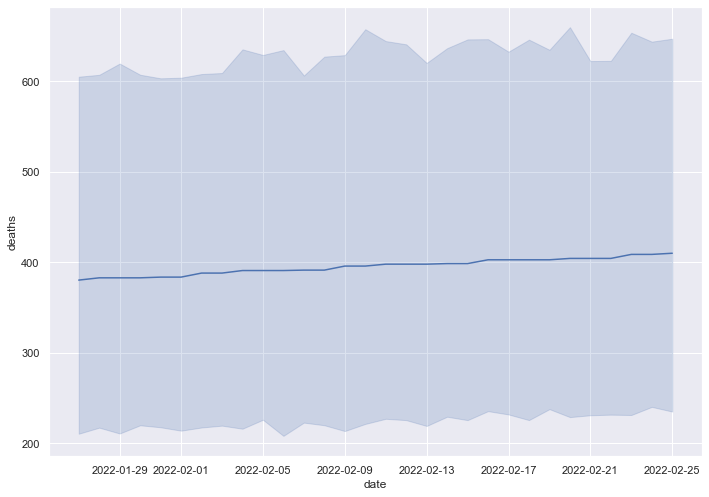

In [16]:
sns.lineplot(x='date', y='deaths', data=mi)

### Deaths here in Michigan are on the rise considering where they were 30 days ago
#### Let's look at what it looks like in my county

<AxesSubplot:xlabel='date', ylabel='deaths'>

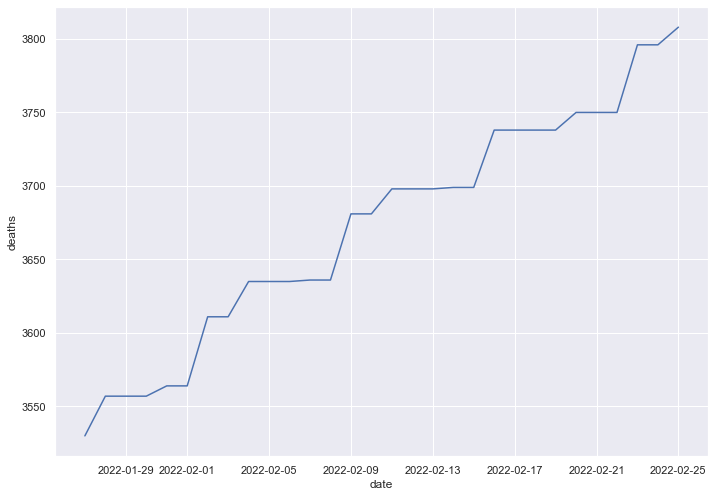

In [17]:
sns.lineplot(x='date', y='deaths', data=mi[mi['county'] == 'Macomb'])

### This looks bad. I live in this county and the daily deaths from COVID has risen by about 500
#### Let's see if the data is questionable

In [18]:
mi[mi['county'] == 'Macomb'].head(10)

,date,county,state,fips,cases,deaths
1293,2022-01-27,Macomb,Michigan,26099.0,212077,3530.0
4547,2022-01-28,Macomb,Michigan,26099.0,214423,3557.0
7802,2022-01-29,Macomb,Michigan,26099.0,214423,3557.0
11057,2022-01-30,Macomb,Michigan,26099.0,214423,3557.0
14312,2022-01-31,Macomb,Michigan,26099.0,216996,3564.0
17565,2022-02-01,Macomb,Michigan,26099.0,216996,3564.0
20818,2022-02-02,Macomb,Michigan,26099.0,219141,3611.0
24070,2022-02-03,Macomb,Michigan,26099.0,219141,3611.0
27322,2022-02-04,Macomb,Michigan,26099.0,220073,3635.0
30574,2022-02-05,Macomb,Michigan,26099.0,220073,3635.0


In [19]:
mi[mi['county'] == 'Macomb'].tail(10)

,date,county,state,fips,cases,deaths
66355,2022-02-16,Macomb,Michigan,26099.0,222947,3738.0
69606,2022-02-17,Macomb,Michigan,26099.0,222947,3738.0
72857,2022-02-18,Macomb,Michigan,26099.0,222947,3738.0
76108,2022-02-19,Macomb,Michigan,26099.0,222947,3738.0
79359,2022-02-20,Macomb,Michigan,26099.0,223371,3750.0
82610,2022-02-21,Macomb,Michigan,26099.0,223371,3750.0
85861,2022-02-22,Macomb,Michigan,26099.0,223371,3750.0
89113,2022-02-23,Macomb,Michigan,26099.0,224132,3796.0
92365,2022-02-24,Macomb,Michigan,26099.0,224132,3796.0
95617,2022-02-25,Macomb,Michigan,26099.0,224824,3808.0


#### Ok, so this makes more sense. The deaths are cumulative since the start of the pandemic.
#### We can cross check our data with this website (https://mcmap.maps.arcgis.com/apps/dashboards/439123f4ca934ceb893927776fcda9f8)

In [20]:
percentage = sum(df['deaths'])/sum(df['cases'])

In [21]:
# going overall death rate over the past 30 days
round(percentage, 3)*100

1.2

In [22]:
mi_percentage = sum(mi['deaths'])/sum(mi['cases'])

In [23]:
# going death rate over the past 30 days in Michigan
round(mi_percentage, 4)*100

1.44

In [27]:
macomb = mi[mi['county']=='Macomb']

#### It looks like COVID is worse here in Michigan than it is overall

In [28]:
macomb_percentage = sum(macomb['deaths'])/sum(macomb['cases'])

In [29]:
# going death rate over the past 30 days in Macomb, Michigan
round(macomb_percentage, 4)*100

1.66

#### COVID death rates in my county is still pretty low but it looks like it's worse than the average both in Michigan and overall

In [30]:
macomb['daily deaths'] = macomb['deaths'].diff()

/var/folders/72/qpl2gs6n0q322mc2k5cf2qyr0000gn/T/ipykernel_56930/2141413672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macomb['daily deaths'] = macomb['deaths'].diff()


In [31]:
macomb.tail()

,date,county,state,fips,cases,deaths,daily deaths
82610,2022-02-21,Macomb,Michigan,26099.0,223371,3750.0,0.0
85861,2022-02-22,Macomb,Michigan,26099.0,223371,3750.0,0.0
89113,2022-02-23,Macomb,Michigan,26099.0,224132,3796.0,46.0
92365,2022-02-24,Macomb,Michigan,26099.0,224132,3796.0,0.0
95617,2022-02-25,Macomb,Michigan,26099.0,224824,3808.0,12.0


/Users/nicholasreardon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='daily deaths'>

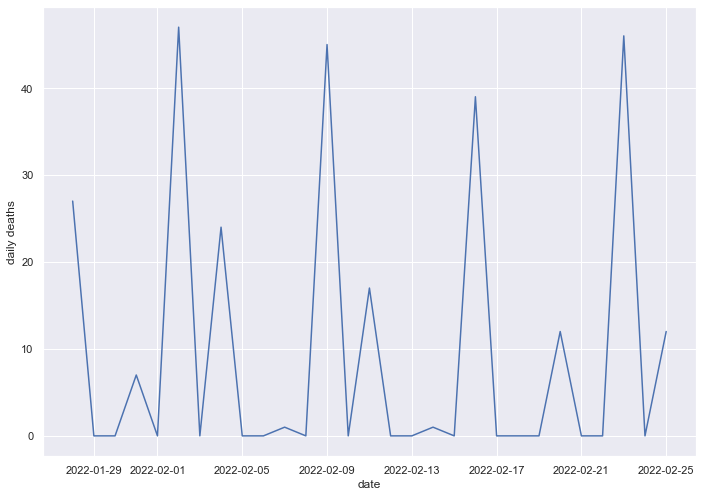

In [32]:
sns.lineplot('date', 'daily deaths', data=macomb)

#### The data is intermittent, which is somewhat suprising to see...

#### Let's see if we can get a good forecast using DeepAR (GluonTS)

In [33]:
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.mx.trainer import Trainer

In [34]:
macomb.index=macomb['date']
del macomb['date']

/Users/nicholasreardon/opt/anaconda3/lib/python3.9/site-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/Users/nicholasreardon/opt/anaconda3/lib/python3.9/site-packages/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._min_time_point, self._max_time_point, freq=start.freq
  0%|          | 0/50 [00:00<?, ?it/s]/Users/nicholasreardon/opt/anaconda3/lib/python3.9/site-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
100%|██████████| 50/50 [00:00<00:00, 79.28it/s, epoch=25/25, avg_epoch_loss=0.649]

[-2.7871945   3.86978     5.2535458  -0.06253766 -4.68054   ]


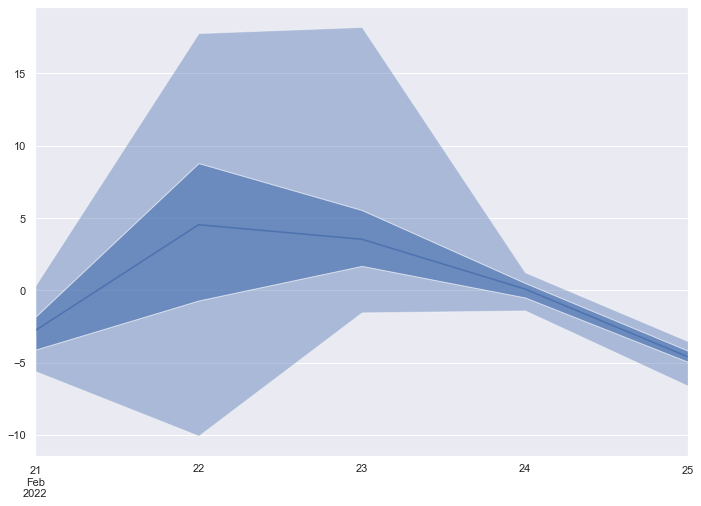

In [52]:
data = common.ListDataset([{
    "start": macomb.index[0],
    "target": macomb['daily deaths'][:"2022-02-20"]
}],
                          freq="D")

trainer = Trainer(epochs=25)

estimator = deepar.DeepAREstimator(
    freq="D", prediction_length=5, trainer=trainer)

predictor = estimator.train(training_data=data)

prediction = next(predictor.predict(data))
print(prediction.mean)
prediction.plot(output_file='graph.png')

<AxesSubplot:xlabel='date', ylabel='daily deaths'>

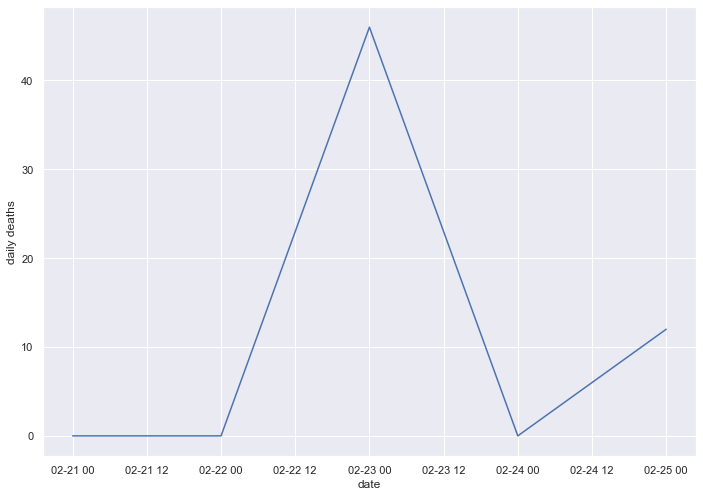

In [51]:
sns.lineplot(macomb.index[-5:],macomb['daily deaths']["2022-02-21":])

#### Maybe DeepAR is not the best model to go with judging by the two graphs above. When using Deep Learning you typically want to have more data to train with. However, after training other statistical and seasonal models it is apparent that DeepAR is actually the best.

#### If you compare the highest point in the DeepAR Forecast you'll see that it is relatively close to what the actual value is minus the intermittent aspect.